## AI Orientation MAP Visualization

In [1]:
# Import all needed packages
import os
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs
import py4DSTEM
import ase.io
import abtem
import matplotlib
import mplcyberpunk

# Custom functions used in this script
# from cepstral import browser  # Explicitly import the browser function
from Plot_Style import Plot_Style_OM_activate  # Import custom plot style

# Load custom plot style
Plot_Style_OM_activate(white_bkg_for_visualization=True)

# Uncomment the following line to use cyberpunk style instead
# plt.style.use('cyberpunk')

# Note: This line is specific to Jupyter Notebooks
# Uncomment if running in Jupyter
%matplotlib ipympl

# Print the py4DSTEM version
print(py4DSTEM.__version__)

0.14.16


In [174]:
# load the data

# import the converted data
fp = '//masc_shared/ag_volz/Oliver_Maßmeyer/AI_Orientation_Maps'
fn = 'Class_pred_ped_1x1mean_e7.npy'
filepath_data = os.path.join(fp, fn)

# create folder for results
fsf = 'Evaluation'
if not os.path.exists(os.path.join(fp, fsf)):
    os.mkdir(os.path.join(fp, fsf))

# save file evals
save_path_evaluations = os.path.join(fp, fsf, 'Class_pred_ped_1x1mean_e7_evaluations.h5')

## load npy array

orientationData = np.load(filepath_data)

# # Load the datacube using py4DSTEM
# dataset = py4DSTEM.read(
#     filepath_data,
# )



In [265]:
## load LiNiO2 Crystal file
fp_cif = '//masc_shared/ag_volz/Oliver_Maßmeyer/AI_Orientation_Maps'
fn_xyz = 'LiNiO2_mp-25411_symmetrized.cif'

filepath_cif = os.path.join(fp_cif,fn_xyz)

ase_atoms = ase.io.read(filepath_cif)
crystal = py4DSTEM.process.diffraction.Crystal.from_ase(ase_atoms)

# Calculate structure factors
k_max = 3


(q_SF, I_SF) = crystal.calculate_structure_factors(
    k_max,
    tol_structure_factor = 0.001,
    return_intensities = True,
)


#create orientation plan from crystal file
acom_params = {
    'zone_axis_range': 'auto',#'auto','full','fiber'
    # 'zone_axis_range': 'half',#'auto','full','fiber'
    # 'fiber_axis': [0,0,1],
    # 'fiber_angles': [0,180.0],
    'angle_step_in_plane': 2,
    'angle_step_zone_axis': 2,
    # 'angle_coarse_zone_axis': 4.,
    # 'angle_refine_range': 10.,
    'accel_voltage': 300e3,
    'corr_kernel_size': 0.01,
    'power_intensity': 0.25,
    # 'power_intensity_experiment': 0.1,
    'power_radial': 1,
    'calculate_correlation_array': True,
    'tol_peak_delete': 0.9,
    # 'sigma_excitation_error': 0.06,
    # 'precession_angle_degrees': 0.6,
}

#create the orientation plan
crystal.orientation_plan(
    **acom_params
)


This Atoms object contains occupancy information but it will be ignored.


Automatically detected point group -3m,
 using arguments: zone_axis_range = 
fiber, 
 fiber_axis=[0, 0, 1], fiber_angles=[90.0, 60.0].


Orientation plan: 100%|██████████| 1081/1081 [00:00<00:00, 3869.06 zone axes/s]


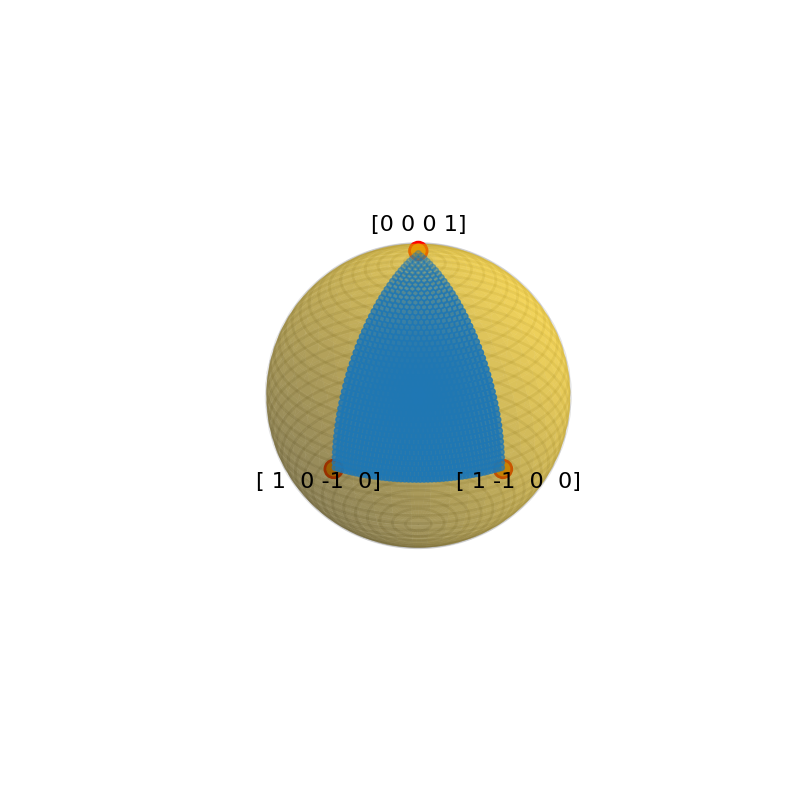

In [266]:
crystal.plot_orientation_zones()

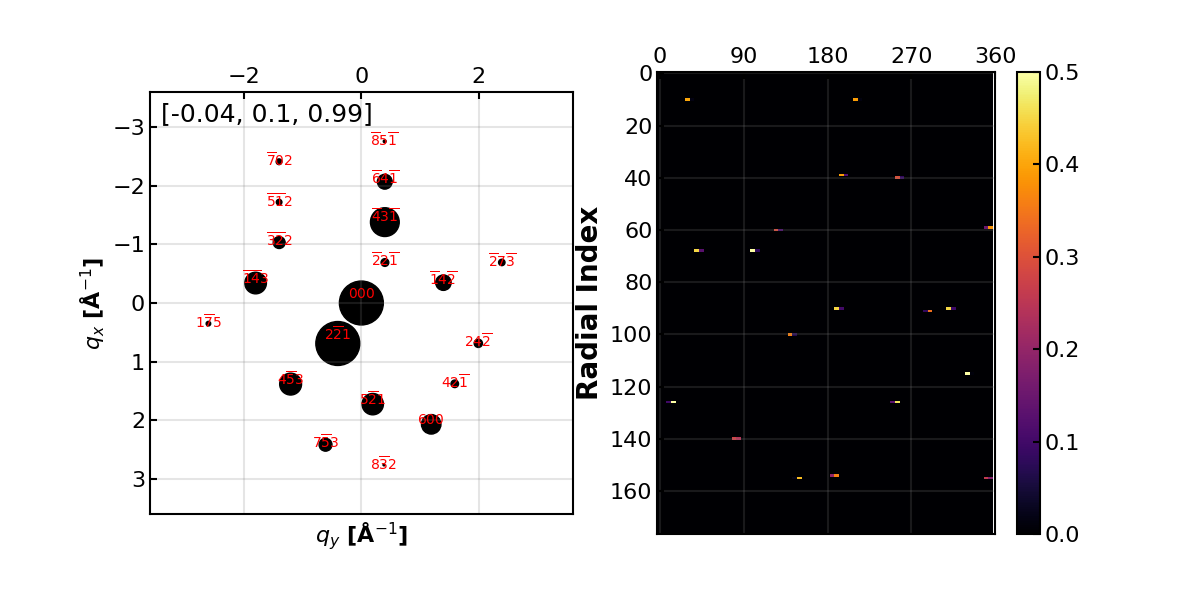

Text(0.5, 1.0, 'Orientation Plan')

In [257]:
## visualization
crystal.plot_orientation_plan(
    scale_markers=1e6, #added
    shift_labels=0, #added
    # index_plot = 1,
    zone_axis_lattice=np.array([0,1,2]),
    figsize=(12,6),
)
plt.title('Orientation Plan')

In [247]:
orientationMap = py4DSTEM.process.diffraction.utils.OrientationMap(
    orientationData.shape[0],
    orientationData.shape[1],
    1,
)


In [180]:
orientationMap.get_orientation(1,1)

Orientation(num_matches=1)

In [179]:
orientation_map.angles.shape

NameError: name 'orientation_map' is not defined

In [248]:
# put into orientation map
orientationDataExpanded = np.expand_dims(orientationData, axis=2)
orientationDataExpanded.shape

(200, 200, 1, 3)

In [182]:
orientationMap.angles

array([[[[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        ...,

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]]],


       [[[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        ...,

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]]],


       [[[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        ...,

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]]],


       ...,


       [[[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        ...,

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]]],


       [[[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        ...,

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]]],


       [[[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        ...,

        [[0., 0., 0.]],

        [[0., 0., 0.]],

        [[0., 0.,

In [184]:
orientationMap.angles

array([[[[0.78472222, 0.88888889, 0.16666667]],

        [[0.72222222, 0.88888889, 0.97916667]],

        [[0.56944444, 0.11111111, 0.5       ]],

        ...,

        [[0.21527778, 0.98611111, 0.        ]],

        [[0.77083333, 0.95833333, 0.1875    ]],

        [[0.97916667, 0.65277778, 0.625     ]]],


       [[[0.32638889, 0.94444444, 0.66666667]],

        [[0.97222222, 0.34722222, 0.22916667]],

        [[0.6875    , 0.5       , 0.27083333]],

        ...,

        [[0.91666667, 0.97222222, 0.64583333]],

        [[0.77083333, 0.95833333, 0.1875    ]],

        [[0.09722222, 0.86111111, 0.10416667]]],


       [[[0.375     , 0.61111111, 0.75      ]],

        [[0.51388889, 0.11111111, 0.5       ]],

        [[0.00694444, 0.54166667, 0.22916667]],

        ...,

        [[0.77083333, 0.95833333, 0.1875    ]],

        [[0.77083333, 0.95833333, 0.1875    ]],

        [[0.47222222, 0.94444444, 0.1875    ]]],


       ...,


       [[[0.22222222, 0.5       , 0.25      ]],

       

In [249]:
# assign values

orientationMap.angles = orientationDataExpanded

In [185]:
orientationMap.corr.shape

(200, 200, 1)

In [250]:
## fill corr array with ones
orientationMap.corr = np.ones_like(orientationMap.corr)

In [15]:
## calculate missing information for orientation map

crystal.pointgroup.get_space_group_symbol()

crystal.pointgroup.get_point_group_operations()

crystal.orientation_rotation_matrices

[SymmOp(self.affine_matrix=array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])),
 SymmOp(self.affine_matrix=array([[-1.,  0.,  0.,  0.],
        [ 0., -1.,  0.,  0.],
        [ 0.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  1.]])),
 SymmOp(self.affine_matrix=array([[ 0., -1.,  0.,  0.],
        [ 1., -1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]])),
 SymmOp(self.affine_matrix=array([[ 0.,  1.,  0.,  0.],
        [-1.,  1.,  0.,  0.],
        [ 0.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  1.]])),
 SymmOp(self.affine_matrix=array([[-1.,  1.,  0.,  0.],
        [-1.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.]])),
 SymmOp(self.affine_matrix=array([[ 1., -1.,  0.,  0.],
        [ 1.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  1.]])),
 SymmOp(self.affine_matrix=array([[ 0.,  1.,  0.,  0.],
        [ 1.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.],
      

In [21]:
# crystal.symmetry_reduce_directions()
# crystal.orientation_map_to_orix_CrystalMap??
crystal.orientation_vecs

array([[ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.0348995 ,  0.99939083],
       [ 0.0348995 ,  0.        ,  0.99939083],
       ...,
       [-0.9945219 , -0.10452846,  0.        ],
       [-0.99756405, -0.06975647,  0.        ],
       [-0.99939083, -0.0348995 ,  0.        ]])

In [34]:
angles = orientationMap.angles[0][0][0]

In [36]:
angles[1]

0.8888888888888888

In [168]:
orientationMatrix = CalculateOrientationMatrixFromEulerAngles(angles)
orientationMatrix

array([[ 0.62154148,  0.42361919,  0.65896356],
       [ 0.10456019,  0.78879147, -0.60570223],
       [-0.77637192,  0.44537041,  0.44597291]])

In [251]:
for  x, eintrag  in enumerate(orientationMap.angles):
    for y, eulerAngleMatches in enumerate(eintrag):
        for num, eulerAngles in enumerate(eulerAngleMatches):
            orientationMatrix = CalculateOrientationMatrixFromEulerAngles(eulerAngles)
            orientationMap.matrix[x][y][num] = orientationMatrix
            orientation = py4DSTEM.process.diffraction.crystal.Orientation(1)
            orientation.matrix = np.array([orientationMatrix])
            orientationMap.family[x][y][num] = crystal.symmetry_reduce_directions(orientation = orientation).family
            
            
    # py4DSTEM.process.diffraction.crystal.Orientation(1)

In [170]:
orientationMap.matrix

array([[[[[ 1.,  0.,  0.],
          [ 0.,  1.,  0.],
          [-0.,  0.,  1.]]],


        [[[ 1.,  0.,  0.],
          [ 0.,  1.,  0.],
          [-0.,  0.,  1.]]],


        [[[ 1.,  0.,  0.],
          [ 0.,  1.,  0.],
          [-0.,  0.,  1.]]],


        ...,


        [[[ 1.,  0.,  0.],
          [ 0.,  1.,  0.],
          [-0.,  0.,  1.]]],


        [[[ 1.,  0.,  0.],
          [ 0.,  1.,  0.],
          [-0.,  0.,  1.]]],


        [[[ 1.,  0.,  0.],
          [ 0.,  1.,  0.],
          [-0.,  0.,  1.]]]],



       [[[[ 1.,  0.,  0.],
          [ 0.,  1.,  0.],
          [-0.,  0.,  1.]]],


        [[[ 1.,  0.,  0.],
          [ 0.,  1.,  0.],
          [-0.,  0.,  1.]]],


        [[[ 1.,  0.,  0.],
          [ 0.,  1.,  0.],
          [-0.,  0.,  1.]]],


        ...,


        [[[ 1.,  0.,  0.],
          [ 0.,  1.,  0.],
          [-0.,  0.,  1.]]],


        [[[ 1.,  0.,  0.],
          [ 0.,  1.,  0.],
          [-0.,  0.,  1.]]],


        [[[ 1.,  0.,  0.],
      

In [252]:
## add corr array
orientationMap.corr = np.ones_like(orientationMap.corr)

In [113]:
crystal.symmetry_reduce_directions(orientation = orientationMap)

IndexError: index 1 is out of bounds for axis 2 with size 1

In [127]:
orientationMap.corr

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]])

In [116]:
test_orientation = py4DSTEM.process.diffraction.crystal.Orientation(1)
test_orientation.matrix = orientationMap.matrix[0][0]
test_orientation.matrix

array([[[ 0.62154148,  0.42361919,  0.65896356],
        [ 0.10456019,  0.78879147, -0.60570223],
        [-0.77637192,  0.44537041,  0.44597291]]])

In [118]:
test_orientation.matrix

array([[[ 0.62154148,  0.42361919,  0.65896356],
        [ 0.10456019,  0.78879147, -0.60570223],
        [-0.77637192,  0.44537041,  0.44597291]]])

In [102]:
orientationMap.matrix[0][0]

array([[[ 0.62154148,  0.42361919,  0.65896356],
        [ 0.10456019,  0.78879147, -0.60570223],
        [-0.77637192,  0.44537041,  0.44597291]]])

In [106]:
test_orientation.family

array([[[0.22021895, 0.42361919, 0.19507173],
        [0.5905508 , 0.78879147, 0.8735303 ],
        [0.77637192, 0.44537041, 0.44597291]]])

In [109]:
crystal.symmetry_reduce_directions(orientation = test_orientation).family

array([[[0.22021895, 0.42361919, 0.19507173],
        [0.5905508 , 0.78879147, 0.8735303 ],
        [0.77637192, 0.44537041, 0.44597291]]])

In [108]:
## get family 

test = crystal.symmetry_reduce_directions(orientation = test_orientation)
test.family

array([[[0.22021895, 0.42361919, 0.19507173],
        [0.5905508 , 0.78879147, 0.8735303 ],
        [0.77637192, 0.44537041, 0.44597291]]])

In [45]:
def CalculateOrientationMatrixFromEulerAngles(angles):
    
    orientationMatrix = np.zeros([3,3])

    #Euler Angles
    a = angles[0] #alpha - yaw
    b = angles[1] #beta - ptich
    y = angles[2] #gamma - roll
    
    orientationMatrix[0][0] = np.cos(b)*np.cos(y)
    orientationMatrix[0][1] = np.sin(a)*np.sin(b)*np.cos(y) - np.cos(a)*np.sin(y)
    orientationMatrix[0][2] = np.cos(a)*np.sin(b)*np.cos(y) + np.sin(a)*np.sin(y)
    orientationMatrix[1][0] = np.cos(b)*np.sin(y)
    orientationMatrix[1][1] = np.sin(a)*np.sin(b)*np.sin(y) + np.cos(a)*np.cos(y)
    orientationMatrix[1][2] = np.cos(a)*np.sin(b)*np.sin(y) - np.sin(a)*np.cos(y)
    orientationMatrix[2][0] = -np.sin(b)
    orientationMatrix[2][1] = np.sin(a)*np.cos(b)
    orientationMatrix[2][2] = np.cos(a)*np.cos(b)

    return orientationMatrix
    

In [243]:
## readout crystal symmetry

print(crystal.pointgroup.get_point_group_symbol())
print(crystal.pointgroup.get_space_group_number())

-3m
166


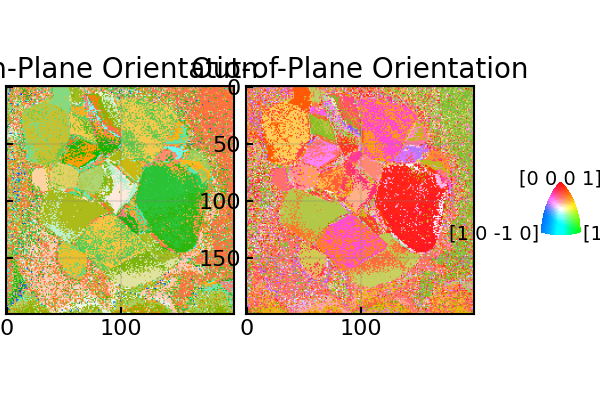

In [298]:
images_orientation = crystal.plot_orientation_maps(
    orientation_map = orientationMap,
    orientation_ind = 0,
    dir_in_plane_degrees = 0,
    corr_range = [0, 1],
    corr_normalize= True,
    show_legend= True,
    scale_legend = True,
    figsize = (6, 4),
    # figbound = (0.1, 0.2),
    show_axes= True,
    camera_dist=None,
    plot_limit=None,
    plot_layout=0,
    swap_axes_xy_limits=False,
    returnfig = False,
    progress_bar=False,
    # medfilt_size=3,
    
)

In [305]:
medianFilterSize = 5
images_orientation_medfilt[:,:,0,1] = medfilt(images_orientation[:,:,0,1],medianFilterSize)
images_orientation_medfilt[:,:,1,1] = medfilt(images_orientation[:,:,1,1],medianFilterSize)
images_orientation_medfilt[:,:,2,1] = medfilt(images_orientation[:,:,2,1],medianFilterSize)

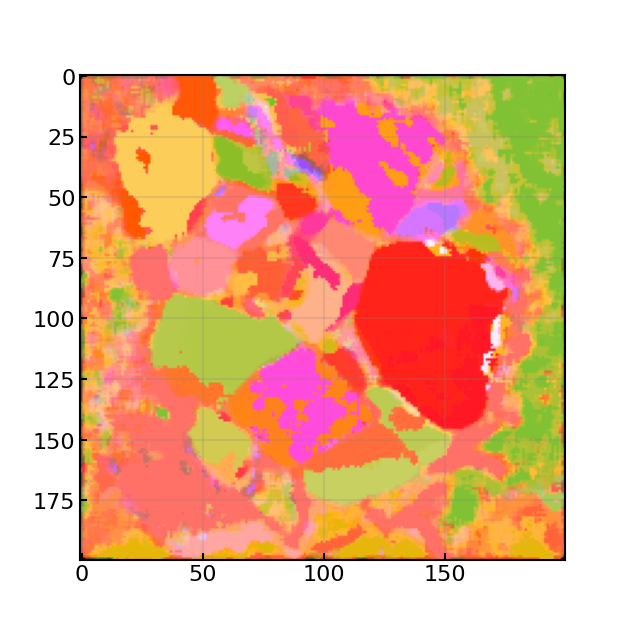

In [306]:
from scipy.signal import medfilt
plt.close('all')
plt.imshow(images_orientation_medfilt[:,:,:,1])
plt.show()

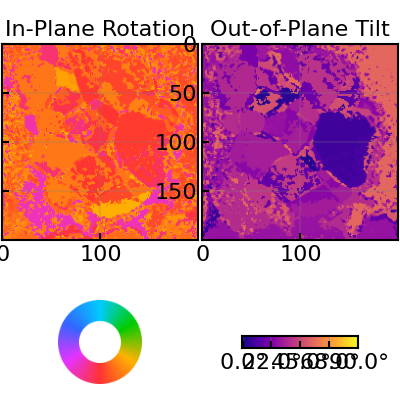

In [271]:
images_orientation = crystal.plot_fiber_orientation_maps(
    orientationMap,
    symmetry_order = 1,
    symmetry_mirror = False,
    dir_in_plane_degrees = 45, #set the reference angle
    corr_range = [0.9, 1.0],
    figsize = (4,4),
    medfilt_size=3,
    leg_size = 100,
)

In [23]:
orientationMap.matrix

array([[[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        ...,


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]],



       [[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        ...,


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]],



       [[[[0., 0., 0.],
          [0., 0., 0.],
      

In [7]:
py4DSTEM.process.diffraction.crystal.Crystal.plot_orientation_maps??

Signature:
py4DSTEM.process.diffraction.crystal.Crystal.plot_orientation_maps(
    self,
    orientation_map=None,
    orientation_ind: int = 0,
    dir_in_plane_degrees: float = 0.0,
    corr_range: numpy.ndarray = array([0, 5]),
    corr_normalize: bool = True,
    show_legend: bool = True,
    scale_legend: bool = None,
    figsize: Union[list, tuple, numpy.ndarray] = (16, 5),
    figbound: Union[list, tuple, numpy.ndarray] = (0.01, 0.005),
    show_axes: bool = True,
    camera_dist=None,
    plot_limit=None,
    plot_layout=0,
    swap_axes_xy_limits=False,
    returnfig: bool = False,
    progress_bar=False,
)
Source:   
def plot_orientation_maps(
    self,
    orientation_map=None,
    orientation_ind: int = 0,
    dir_in_plane_degrees: float = 0.0,
    corr_range: np.ndarray = np.array([0, 5]),
    corr_normalize: bool = True,
    show_legend: bool = True,
    scale_legend: bool = None,
    figsize: Union[list, tuple, np.ndarray] = (16, 5),
    figbound: Union[list, tuple, np.n

In [4]:
orientationData

array([[[0.78472222, 0.88888889, 0.16666667],
        [0.72222222, 0.88888889, 0.97916667],
        [0.56944444, 0.11111111, 0.5       ],
        ...,
        [0.21527778, 0.98611111, 0.        ],
        [0.77083333, 0.95833333, 0.1875    ],
        [0.97916667, 0.65277778, 0.625     ]],

       [[0.32638889, 0.94444444, 0.66666667],
        [0.97222222, 0.34722222, 0.22916667],
        [0.6875    , 0.5       , 0.27083333],
        ...,
        [0.91666667, 0.97222222, 0.64583333],
        [0.77083333, 0.95833333, 0.1875    ],
        [0.09722222, 0.86111111, 0.10416667]],

       [[0.375     , 0.61111111, 0.75      ],
        [0.51388889, 0.11111111, 0.5       ],
        [0.00694444, 0.54166667, 0.22916667],
        ...,
        [0.77083333, 0.95833333, 0.1875    ],
        [0.77083333, 0.95833333, 0.1875    ],
        [0.47222222, 0.94444444, 0.1875    ]],

       ...,

       [[0.22222222, 0.5       , 0.25      ],
        [0.02777778, 0.5       , 0.27083333],
        [0.98611111, 0